## ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png

1. Прочитайте изображение из файла и выведите его на экран:

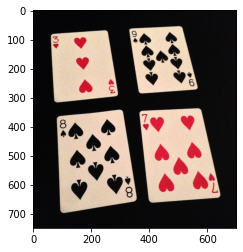

(749, 700, 4)


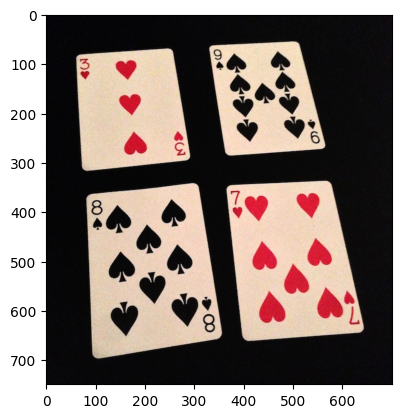

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

img = imread('/content/9060450367_b67ef44444_o.png')
print(img.shape)
plt.imshow(img)

2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):

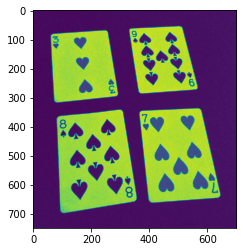

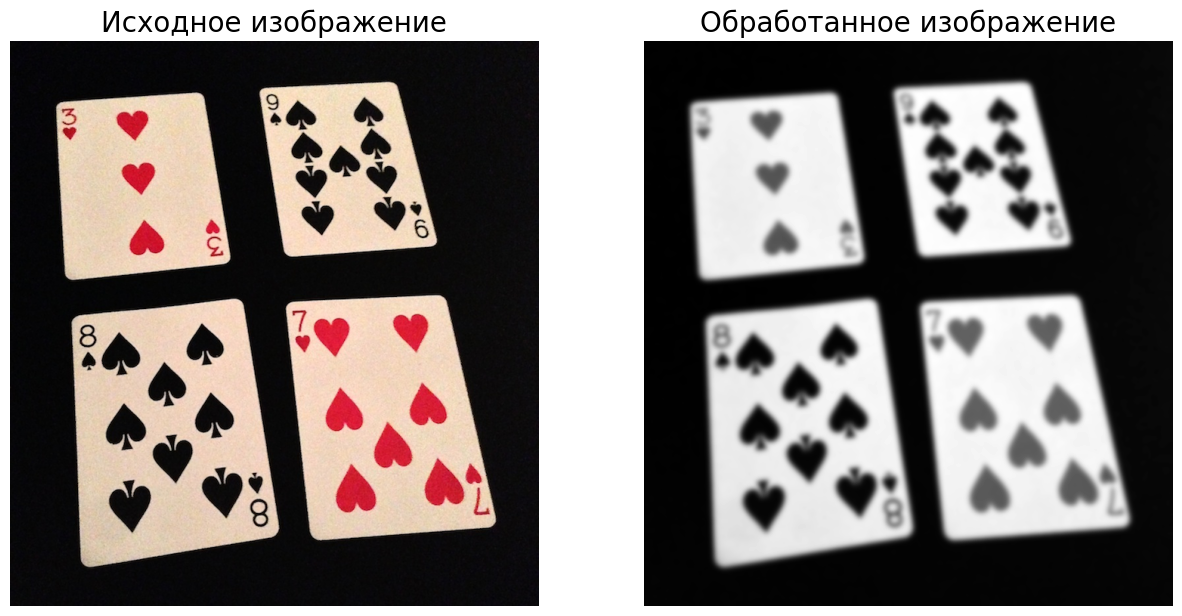

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Основная команда - в оттенки серого
blur_img = cv2.GaussianBlur(gray_img, (21, 21), 0) # Основная команда - фильтр размытия
font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(blur_img, cmap='gray')
plt.show()


3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

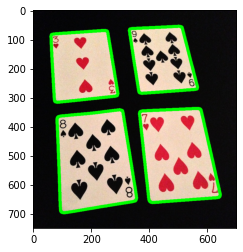

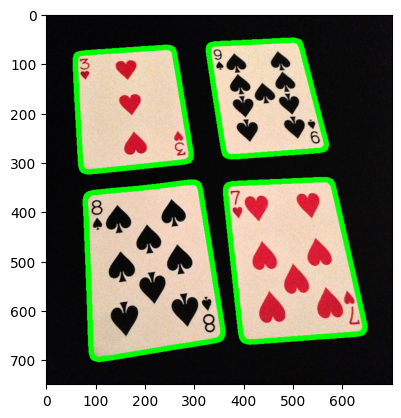

In [8]:
numcards = 4

flag, thresh = cv2.threshold(blur_img, 50, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.imshow(contours_img)
plt.show()

4. Примените к каждому контуру проективное преобразование и выведите отдельным
изображением:

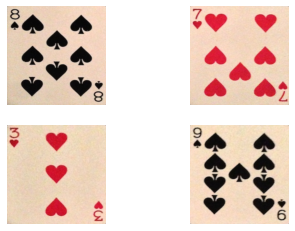

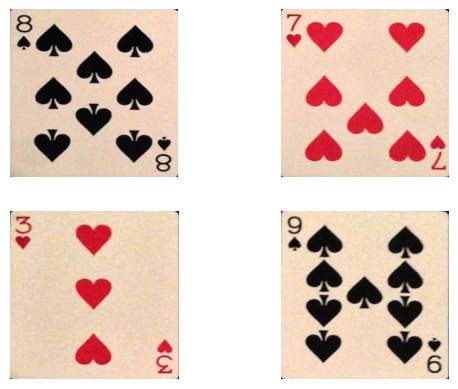

In [9]:
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    plt.subplot(2,2,i+1); plt.axis('off')
    plt.imshow(warp)

plt.show()


5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

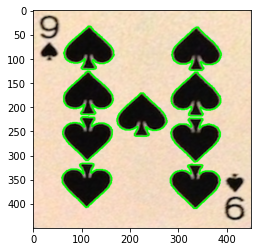

9


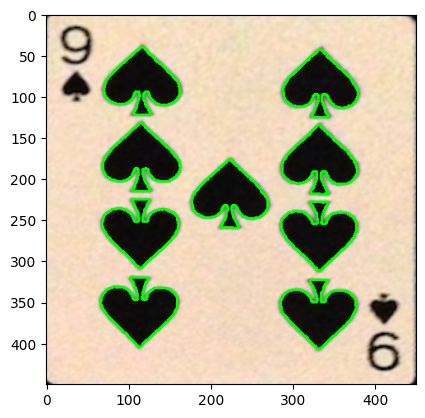

In [10]:
img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
contours_img = warp.copy()

flag, thresh = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour) > main_area * .5:
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()


6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

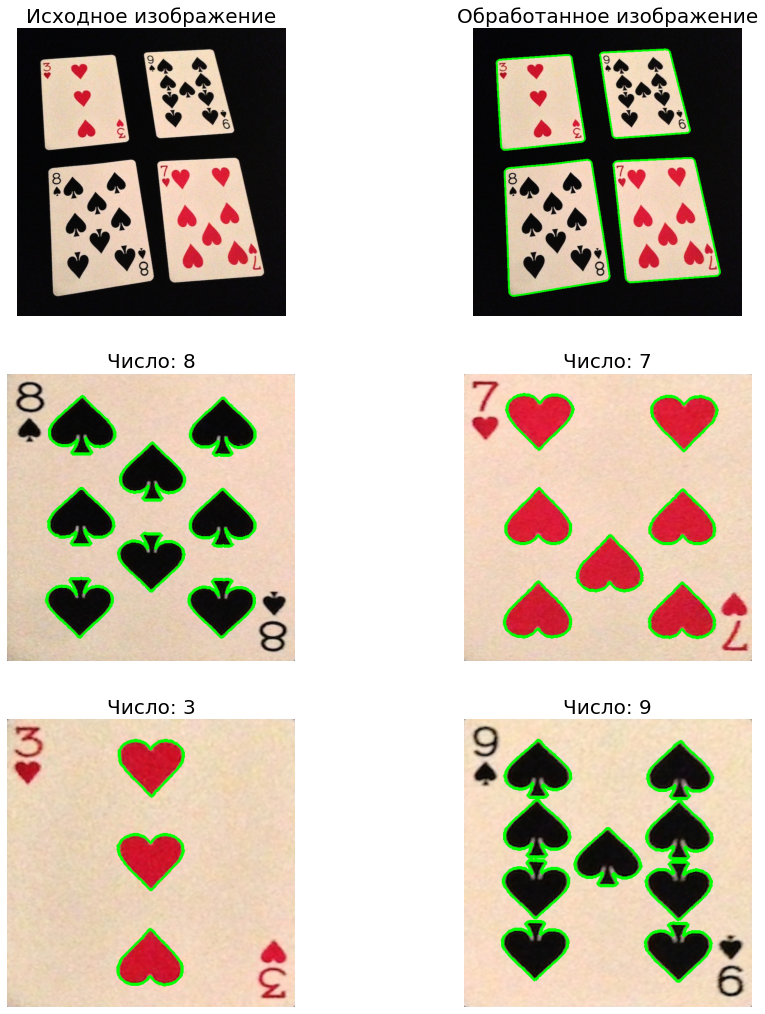

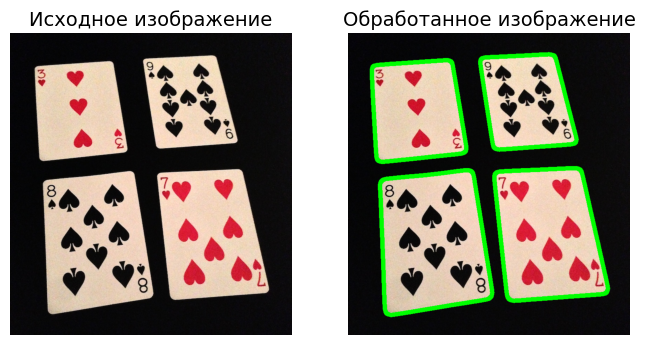

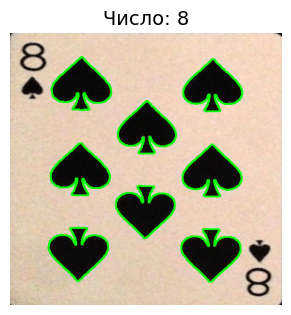

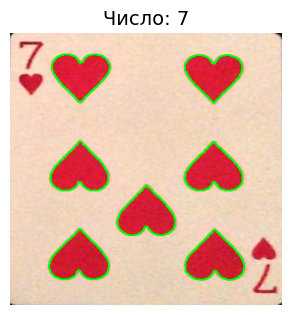

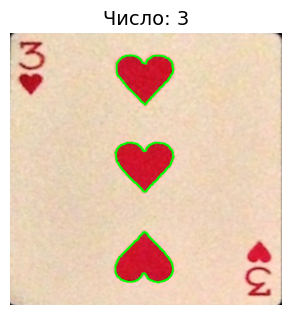

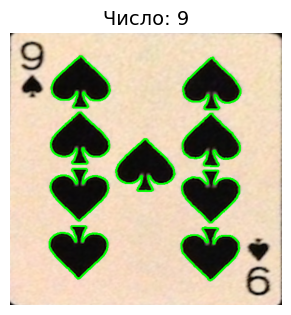

In [32]:
img = imread('/content/9060450367_b67ef44444_o.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Основная команда - в оттенки серого
blur_img = cv2.GaussianBlur(gray_img, (21, 21), 0) # Основная команда - фильтр размытия
numcards = 4
flag, thresh = cv2.threshold(blur_img, 50, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]
contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
font_size = 14
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(contours_img)
plt.show()

for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0, 0],[450, 0],[450, 450],[0, 450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
    contours_img = warp.copy()

    flag, thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
    contours_itr, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours_itr = sorted(contours_itr, key=cv2.contourArea, reverse=True)

    main_contours = []
    main_area = 0
    for contour in contours_itr:
      if cv2.contourArea(contour) > 0.9* warp.shape[0]*warp.shape[1]: continue
      if main_area == 0:
        main_contours.append(contour)
        main_area = cv2.contourArea(contour)
      else:
        if cv2.contourArea(contour) > 0.9 * main_area :
          main_contours.append(contour)

    cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
    plt.figure(figsize=(14, 12))
    plt.subplot(3, 2, i+3).set_title('Число: ' + str(len(main_contours)), fontsize = font_size); plt.axis('off')
    plt.imshow(contours_img)

plt.show()

## ДЗ №2
Подумайте, что нужно изменить, чтобы код сработал для этого изображения:

https://arnab.org/blog/so-i-suck-24-automating-card-games-using-opencv-and-python/

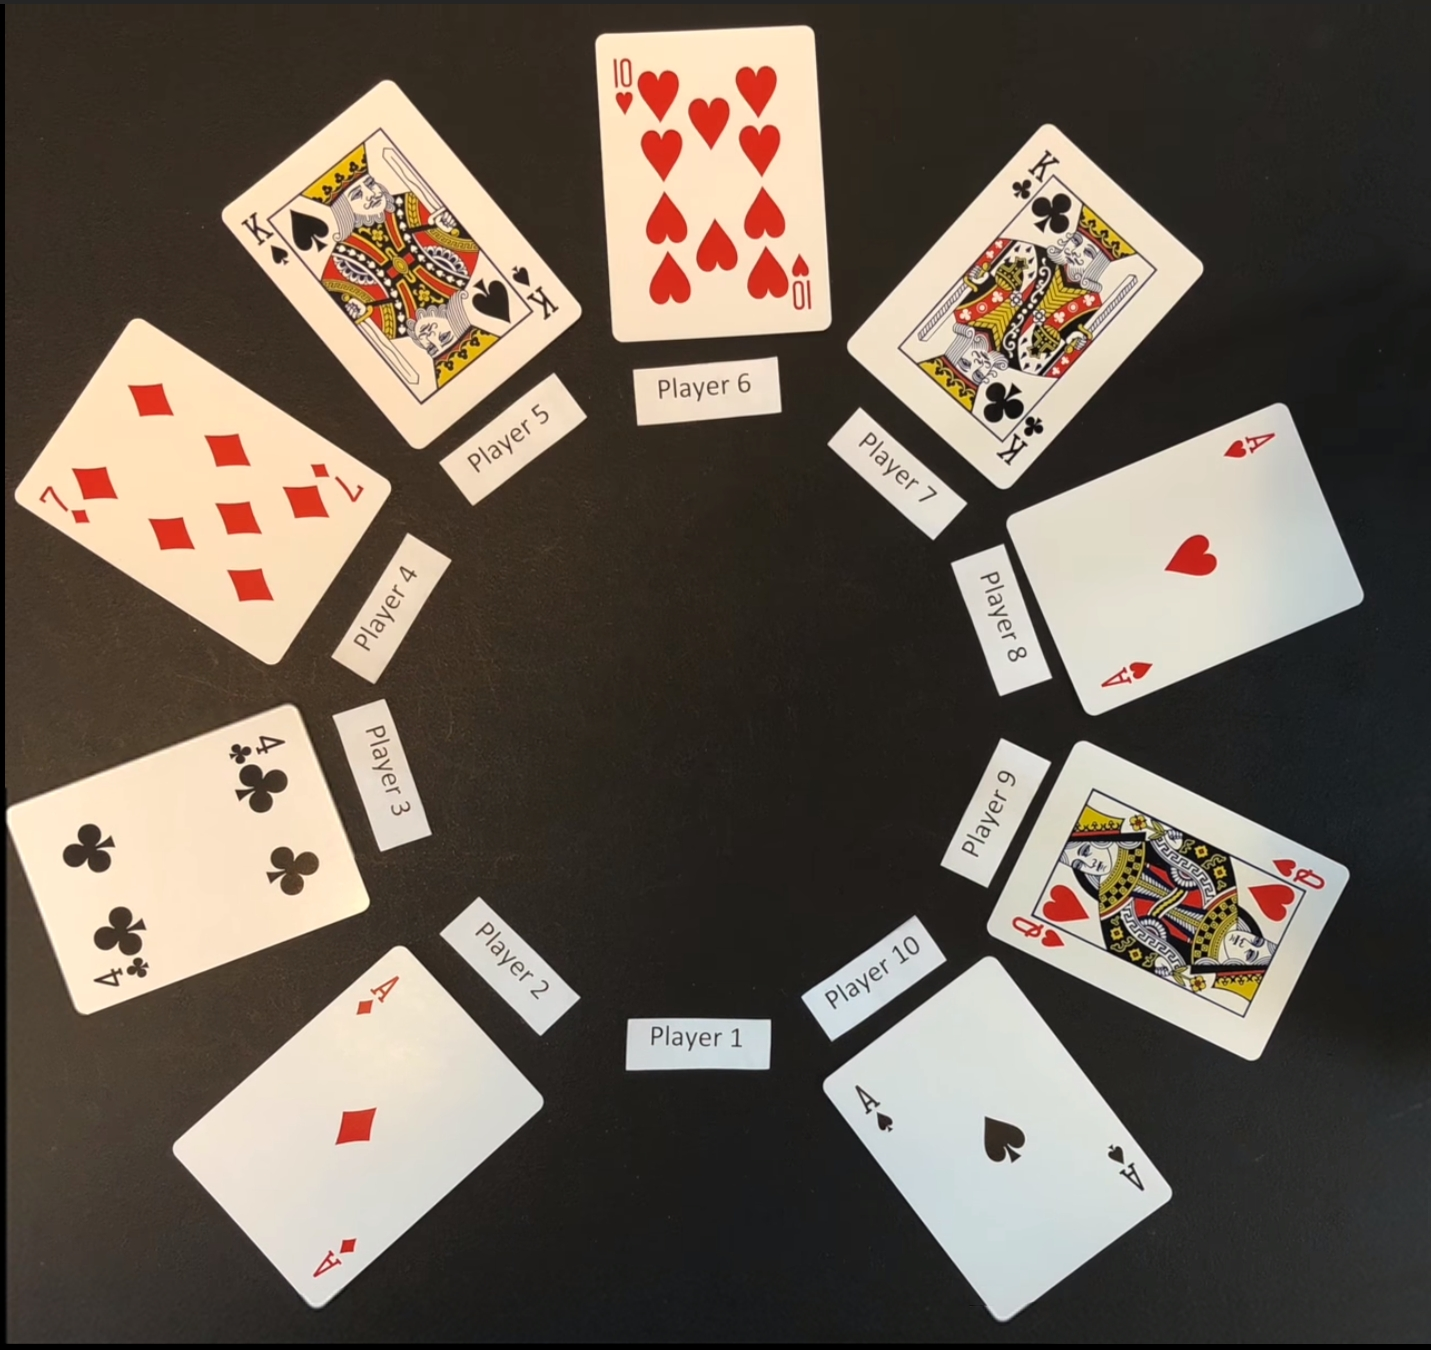
